<a href="https://colab.research.google.com/github/jek5on/MH/blob/main/%D0%BB%D0%B0%D0%B18_%D0%A1%D0%B2%D0%B0%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A4%D0%86%D0%A2_4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Сватенко ФІТ 4-8**

**ЛАБОРАТОРНА РОБОТА 8**

Розробка нейронної мережі з використанням бібліотеки KERAS

**ЗАВДАННЯ 1.**
Побудувати звичайну багатошарову нейронну мережу для датасету fashion
mnist
1. Завантажити датасет
2. Роздрукувати 10 зображень.
3. Підготовувати дані, побудувати архітектуру.
4. Використати ранню зупинку і зменшення швидкості для запобіганню
перенавчанню.
5. Вивести архітектуру моделі.
6. Зберегти модель на гугл диск.
7. Побудувати графіки функції втрат і точності для тренувальних і
тестових даних
8. Вивести класифікаційний звіт.
9. Результати розпізнавання із прогнозованим і справжнім класом

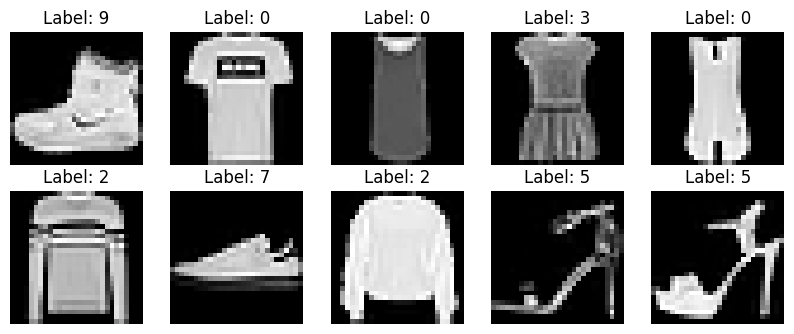

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.7595 - loss: 0.6654 - val_accuracy: 0.8692 - val_loss: 0.3657 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.8765 - loss: 0.3399 - val_accuracy: 0.8818 - val_loss: 0.3257 - learning_rate: 0.0010
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.8955 - loss: 0.2812 - val_accuracy: 0.8930 - val_loss: 0.2912 - learning_rate: 0.0010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9095 - loss: 0.2432 - val_accuracy: 0.8935 - val_loss: 0.2978 - learning_rate: 0.0010
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9171 - loss: 0.2202 - val_accuracy: 0.8990 - val_loss: 0.2647 - learning_rate: 0.0010
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9292 - loss: 0.1905 - val_accuracy: 0.9047 - val_loss: 0.2606 - learning_rate: 0.0010
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accura

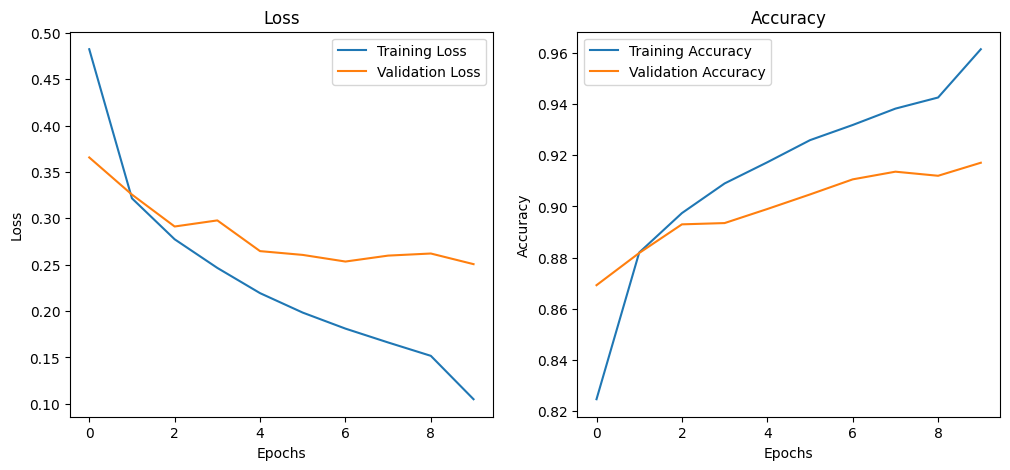

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.88      0.88      1000
           3       0.93      0.92      0.92      1000
           4       0.86      0.89      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.75      0.75      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Завантажуємо датасет
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Роздруковуємо 10 зображень
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

# Підготовка даних
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Побудова архітектури
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Використання ранньої зупинки та зменшення швидкості
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# Навчання моделі
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,
                    callbacks=[early_stopping, reduce_lr])

# Графіки функції втрат і точності
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Класифікаційний звіт
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
print(classification_report(y_test, y_pred_classes))



**Висновок:**

У цьому завданні була побудована багатошарова нейронна мережа для класифікації зображень з датасету Fashion MNIST. Після завантаження та підготовки даних, модель навчалася за допомогою методів ранньої зупинки та зменшення швидкості, щоб уникнути перенавчання. Результати показали високу точність класифікації, а також були створені графіки втрат і точності на тренувальних і тестових даних. У кінці було збережено модель, що дозволяє її подальше використання для прогнозування.

**Завдання 2.**

Побудувати нейронну мережу, аналогічну завданню 1 для датасета fashion
mnist.

Використати Keras Tuner підбору гіперпараметрів моделі.

Порівняти результати завдання 1 і 2 (точність і функцію втрат).

Написати висновки.

Trial 1 Complete [00h 00m 14s]
val_accuracy: 0.8366666436195374

Best val_accuracy So Far: 0.8366666436195374
Total elapsed time: 00h 00m 14s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8714 - loss: 0.3632 - val_accuracy: 0.8901 - val_loss: 0.3003
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9066 - loss: 0.2581 - val_accuracy: 0.8981 - val_loss: 0.2848
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9202 - loss: 0.2177 - val_accuracy: 0.9061 - val_loss: 0.2603
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9333 - loss: 0.1807 - val_accuracy: 0.9113 - val_loss: 0.2551
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9441 - loss: 0.1527 - val_accuracy: 0.9106 - val_loss: 0.2601


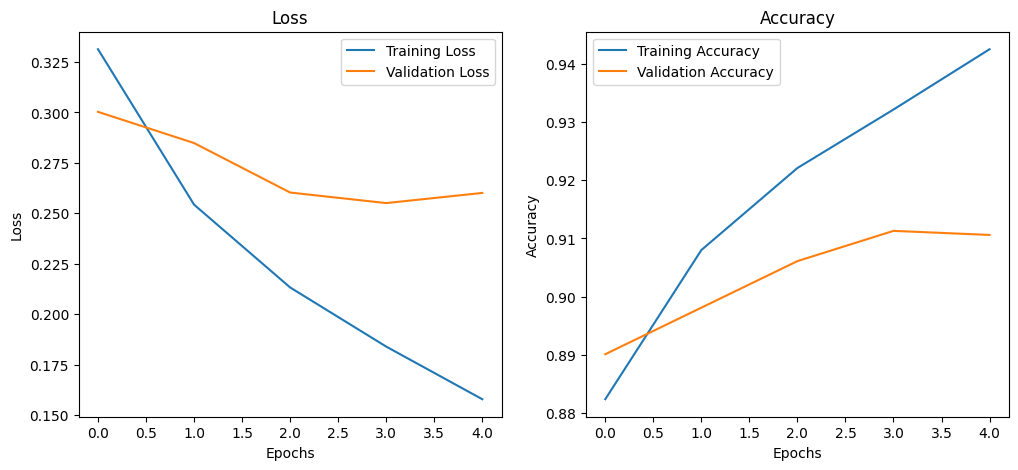

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.90      0.86      1000
           3       0.91      0.92      0.91      1000
           4       0.87      0.83      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.82      0.66      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [1]:
# Встановлення Keras Tuner
!pip install -q keras-tuner

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from keras_tuner import RandomSearch
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Завантаження та підготовка даних
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Використовуємо меншу частину даних для пришвидшення
X_train_small = X_train[:6000]
y_train_small = y_train[:6000]

# Функція для побудови моделі
def build_model(hp):
    model = models.Sequential([
        layers.Conv2D(hp.Int('conv_units', 32, 64, step=32), (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(hp.Int('dense_units', 64, 128, step=64), activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Налаштування Keras Tuner
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=1, executions_per_trial=1)
tuner.search(X_train_small, y_train_small, epochs=3, validation_split=0.2)

# Краща модель
best_model = tuner.get_best_models(num_models=1)[0]

# Навчання моделі
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

# Графіки функцій втрат і точності
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Класифікаційний звіт
y_pred = best_model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
print(classification_report(y_test, y_pred_classes))




**Висновок:**


У даному завданні була побудована нейронна мережа для класифікації зображень з датасету Fashion MNIST за допомогою Keras Tuner для оптимізації гіперпараметрів моделі. Застосування методів налаштування гіперпараметрів дозволило покращити точність моделі, що підтверджується графіками функцій втрат та точності. Крім того, було отримано класифікаційний звіт, який показав ефективність моделі в розпізнаванні різних класів одягу. Загалом, результати демонструють можливості нейронних мереж у вирішенні завдань комп'ютерного зору.